# Caleb Owens Notebook - Predictive ML Project

- Author: [Caleb Owens](https://github.com/CalebOwens314)
- Repository: [datafun-07-ml](https://github.com/CalebOwens314/datafun-07-ml)
- Date: 2026-02-25

In [1]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("Imports complete.")

Imports complete.


## Part 1 - Chart a Straight Line

In [2]:
%matplotlib inline


def c(f: float):
    return 5 / 9 * (f - 32)

In [3]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [4]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

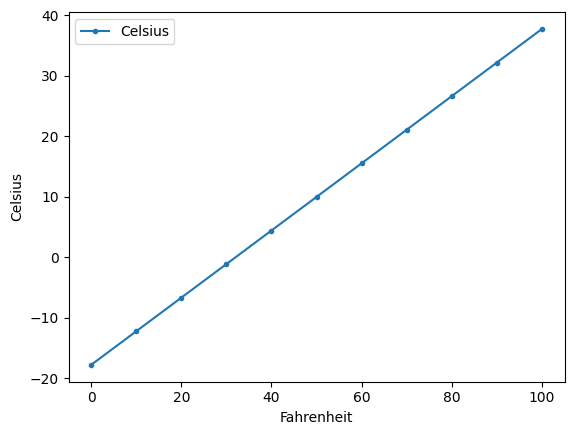

In [5]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [6]:
nyc_df = pd.read_csv(
    'C:\\Repos\\datafun-07-ml\\data\\raw\\ave_hi_nyc_jan_1895-2018.csv'
)

### Section 2 - Data Inspection

In [7]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [8]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [9]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [10]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [11]:
nyc_df.Date.dtype

dtype('int64')

In [12]:
nyc_df['Date'] = nyc_df['Date'].floordiv(100)

In [13]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [14]:
pd.set_option('display.precision', 2)

In [15]:
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [16]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [17]:
linear_regression.slope

np.float64(0.014771361132966163)

In [18]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [19]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

In [20]:
sns.set_style('whitegrid')

(10.0, 70.0)

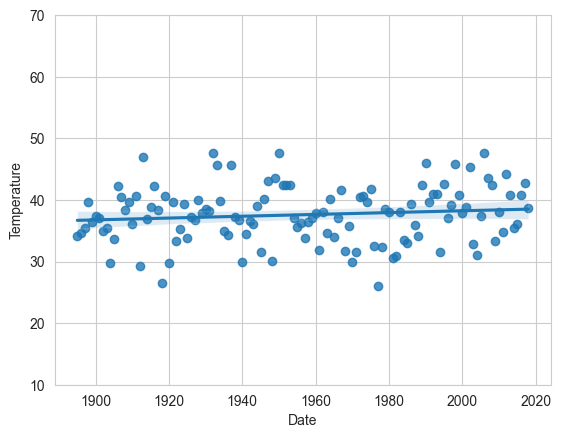

In [21]:
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [22]:
df = pd.read_csv('C:\\Repos\\datafun-07-ml\\data\\raw\\ave_hi_nyc_jan_1895-2018.csv')

In [23]:
df.columns = ['Date', 'Temperature', 'Anomaly']

In [24]:
df['Date'] = df['Date'].floordiv(100)

In [25]:
df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df.Date.to_numpy().reshape(-1, 1),  # Convert to numpy first
    df.Temperature.values,  # y can remain a 1D sequence
    random_state=11,
)

In [27]:
X_train.shape

(93, 1)

In [28]:
X_test.shape

(31, 1)

In [29]:
linear_regression = LinearRegression()

In [30]:
linear_regression.fit(X=X_train, y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
linear_regression.coef_

array([0.01939167])

In [32]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [33]:
predicted = linear_regression.predict(X_test)

In [34]:
expected = y_test

In [35]:
for p, e in zip(predicted[::5], expected[::5], strict=False):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [36]:
def predict(x: float | np.ndarray):
    return linear_regression.coef_ * x + linear_regression.intercept_

In [37]:
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

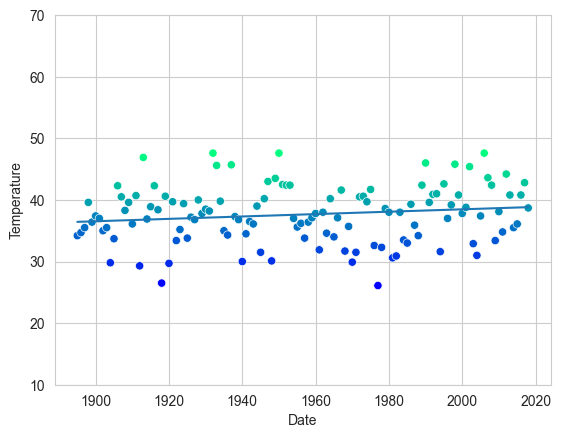

In [38]:
axes = sns.scatterplot(
    data=df,
    x='Date',
    y='Temperature',
    hue='Temperature',
    palette='winter',
    legend=False,
)

axes.set_ylim(10, 70)

x = np.array([min(df.Date.values), max(df.Date.values)])

y = predict(x.reshape(-1, 1))

line = plt.plot(x, y)

## Part 4 - My Insights

- I find the Part 2 method easier to understand than the Part 3 method. 
- I tend to prefer the method used in Part 2 because I have a background in math, and it is easy to connect many lines of code in the Part 2 method to basic concepts in algebra (ex. slope-intercept form of a line). The Part 2 method also seems to require fewer lines of code than the Part 3 method. 
- That said, I do appreciate that the Part 3 method shows the predicted vs. expected values for temperatures at various dates. I feel as though it would be simple to calculate residuals (how far each data point deviates from the line of best fit) after finding that info. 
- I also appreciate the trends in shading with the data points in the Part 3 scatterplot (something that the Part 2 scatterplot lacks), and I wonder if that shading can be manipulated in a way that highlights outliers (farther away from line of best fit in either direction --> darker shading).
- Overall, it seems to me that the Part 2 method is a good place to start with doing regression in a Jupyter notebook for the first time, while the Part 3 method is better for those more experienced with regression who are looking for a more robust array of visualization options for the data they wrangle.